In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.models import Model

from data_generation import *

## Test with Fashion-MNIST Data (from TF docs)

In [2]:
class Autoencoder(Model):
  def __init__(self, original_dim, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(np.product(original_dim), activation='sigmoid'),
      layers.Reshape(original_dim)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

In [71]:
autoencoder = Autoencoder((28,28),64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [72]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0237 - val_loss: 0.0133
Epoch 2/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0093 - val_loss: 0.0092
Epoch 6/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
60000/60000 [==============================] - 10s 170us/sample - los

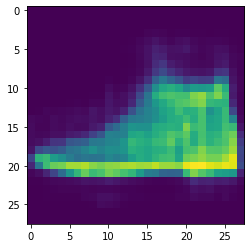

In [84]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
plt.imshow(decoded_imgs[0])

In [48]:
testx = 10 * np.random.rand(200,3)

In [92]:
autoencoder = Autoencoder((3,), 2)
autoencoder.compile(optimizer='adam', loss=tlosses.MeanSquaredError())
autoencoder.fit(testx, testx,
                epochs=10,
                shuffle=True)

Train on 200 samples
Epoch 1/10
200/200 [==============================] - 2s 11ms/sample - loss: 29.6370
Epoch 2/10
200/200 [==============================] - 0s 224us/sample - loss: 29.4393
Epoch 3/10
200/200 [==============================] - 0s 399us/sample - loss: 29.2395
Epoch 4/10
200/200 [==============================] - 0s 738us/sample - loss: 29.0538
Epoch 5/10
200/200 [==============================] - 0s 429us/sample - loss: 28.8702
Epoch 6/10
200/200 [==============================] - 0s 120us/sample - loss: 28.6969
Epoch 7/10
200/200 [==============================] - 0s 204us/sample - loss: 28.5291
Epoch 8/10
200/200 [==============================] - 0s 324us/sample - loss: 28.3681
Epoch 9/10
200/200 [==============================] - 0s 429us/sample - loss: 28.2161
Epoch 10/10
200/200 [==============================] - 0s 204us/sample - loss: 28.0741


In [93]:
autoencoder.encoder(testx).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[0.10273243, 2.7659254 ],
       [0.        , 1.3013647 ],
       [0.        , 6.1242886 ],
       [1.0162189 , 3.146973  ],
       [0.        , 8.942619  ],
       [0.49767047, 6.627884  ],
       [1.5517533 , 5.1691127 ],
       [1.9623103 , 3.477215  ],
       [3.1309047 , 0.7787167 ],
       [1.1138694 , 3.0863163 ],
       [2.7746837 , 1.0116595 ],
       [1.6211312 , 2.952514  ],
       [0.        , 8.766969  ],
       [1.1328514 , 4.893742  ],
       [0.        , 5.1943226 ],
       [0.        , 7.3911076 ],
       [0.2490511 , 7.825014  ],
       [0.8987224 , 4.911863  ],
       [1.6388497 , 4.8133316 ],
       [2.4422228 , 2.8136115 ],
       [0.        , 4.812908  ],
       [0.        , 8.134511  ],
       [0.        , 4.626982  ],
       [1.713757  , 3.2492185 ],
       [0.13634227, 2.9096012 ],
       [0.        , 4.5166445 ],
       [0.        , 7.174412  ],
       [0.4615385 , 4.56998   ],
       [0.        , 4.601959  ],
       [0.        , 8.713144  ],
       [2.

In [12]:
from data_generation import *

In [6]:
np.random.seed(100)
n_features=3
n_samples=1000
epochs=10
X = unif_cylinder(n_samples=n_samples, radius=1, height=100, n_features=n_features)
X = X.reshape(n_samples,n_features)
autoencoder = Autoencoder((3,), 2)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(X, X,
                epochs=epochs,
                shuffle=True)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 1104.3991
Epoch 2/10
1000/1000 [==============================] - 0s 139us/sample - loss: 1104.2054
Epoch 3/10
1000/1000 [==============================] - 0s 133us/sample - loss: 1104.0149
Epoch 4/10
1000/1000 [==============================] - 0s 143us/sample - loss: 1103.8569
Epoch 5/10
1000/1000 [==============================] - 0s 140us/sample - loss: 1103.6451
Epoch 6/10
1000/1000 [==============================] - 0s 131us/sample - loss: 1103.3650
Epoch 7/10
1000/1000 [==============================] - 0s 126us/sample - loss: 1103.0506
Epoch 8/10
1000/1000 [==============================] - 0s 221us/sample - loss: 1102.4474
Epoch 9/10
1000/1000 [==============================] - 0s 150us/sample - loss: 1101.7606
Epoch 10/10
1000/1000 [==============================] - 0s 167us/sample - loss: 1101.0795


(1000, 2)


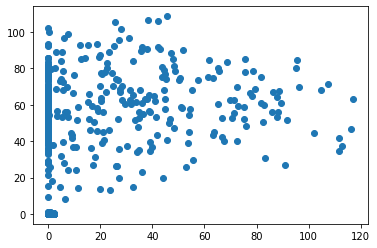

In [16]:
X_new = autoencoder.encoder(X).numpy()
print(X_new.shape)
plt.scatter(X_new[:,0],X_new[:,1])